## Room Occupancy Prediction for Efficient Heating

### Overview
This project aims to optimize room heating by predicting when a room will be occupied. Using a smart algorithm, we can ensure the heating system is active only during those times, saving energy and enhancing comfort.

### How It Works
1. **Data Preparation**: We start by loading historical data about room occupancy. This data includes information like temperature, humidity, and the times when the room was occupied.

2. **Understanding the Data**: We examine the first few entries in our dataset to get a feel for the information we're working with.

3. **Feature Extraction**: We focus on the important aspects, such as the hour of the day, which helps us understand patterns in room usage.

### The Algorithm
- We use a **Long Short-Term Memory (LSTM) model**, a type of deep learning suitable for predicting sequences or patterns over time. This model looks at past occupancy to predict future room usage.
- By learning from historical occupancy patterns, the LSTM can forecast the most likely times the room will be occupied in the future.

### Implementation
```markdown
- Libraries like Pandas for data manipulation, TensorFlow and Keras for machine learning, and Scikit-learn for preprocessing are used.
- The data is loaded and preprocessed, ensuring it's in the right format for the model.
- The LSTM model is then trained with this data, learning to predict occupancy based on features like temperature, light, and CO2 levels.
```

### Benefits
- **Energy Efficiency**: The system activates the heating only when occupancy is predicted, reducing waste.
- **Comfort**: Ensures the room is pre-heated right before use, enhancing comfort without manual intervention.
- **Adaptability**: The system can adapt to changes in occupancy patterns over time, maintaining efficiency.

### Visualization
- We also create a visual representation (a graph) showing the general pattern of room occupancy. This helps in identifying peak occupancy hours, guiding the heating schedule efficiently.

### Conclusion
With the LSTM model's predictions, the heating system can intelligently preheat the room only during predicted occupancy times, saving energy while maintaining comfort. This smart approach leverages historical data to make informed decisions, ensuring the heating system is used only when necessary.

In [64]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.layers import LSTM, Dense  # type: ignore

# Adjust display settings for better output visibility
pd.set_option('display.max_columns', None)  # This will allow all columns to be displayed
pd.set_option('display.width', 1000)  # Adjust this width as necessary to fit your screen

# Load the dataset
dataset_path = r'T:\Sheridan College\Sheridan Sem 2\Artificial Intelligence\Assignmnets\Project\Room Occupancy Datasets\Best DataSet\dataset_training.xlsx'  # Update this to your file's location
data = pd.read_excel(dataset_path)

# Display the first few rows of the dataset to inspect it
print(data.head())

# Preprocess the data: Convert 'date' column to datetime and extract relevant features
data['date'] = pd.to_datetime(data['date'])
data['hour'] = data['date'].dt.hour  # Example feature extraction

                  date  Temperature  Humidity  Light     CO2  HumidityRatio  Occupancy
0  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793          1
1  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783          1
2  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779          1
3  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772          1
4  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757          1


## Data Preparation

- Define relevant features like temperature, humidity, etc., and the target variable (occupancy).
- Scale features to ensure consistency and numerical stability using Min-Max scaling.
- Split the dataset into training and validation sets for model evaluation.


In [65]:
# Prepare dataset for the model
features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'hour']
target = 'Occupancy'

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
data[features] = scaler.fit_transform(data[features])

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

## LSTM Model Definition

- Reshape input data to fit the LSTM model's requirements (3D format).
- Define an LSTM model architecture with 50 units and appropriate input shape.
- Compile the model using Adam optimizer and mean squared error loss function.
- View a summary of the model's architecture.


In [66]:
# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_train_reshaped = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Model summary
model.summary()


C:\Users\Talwinder Singh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,451 (44.73 KB)

 Trainable params: 11,451 (44.73 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training and Visualization

- Train the model on the training data for 20 epochs with a batch size of 72.
- Visualize the training and validation loss to monitor model performance.


Epoch 1/20
73/73 - 1s - 19ms/step - loss: 0.1474 - val_loss: 0.1083
Epoch 2/20
73/73 - 0s - 2ms/step - loss: 0.0895 - val_loss: 0.0636
Epoch 3/20
73/73 - 0s - 1ms/step - loss: 0.0575 - val_loss: 0.0479
Epoch 4/20
73/73 - 0s - 1ms/step - loss: 0.0461 - val_loss: 0.0391
Epoch 5/20
73/73 - 0s - 2ms/step - loss: 0.0381 - val_loss: 0.0322
Epoch 6/20
73/73 - 0s - 2ms/step - loss: 0.0316 - val_loss: 0.0265
Epoch 7/20
73/73 - 0s - 2ms/step - loss: 0.0277 - val_loss: 0.0236
Epoch 8/20
73/73 - 0s - 2ms/step - loss: 0.0259 - val_loss: 0.0220
Epoch 9/20
73/73 - 0s - 2ms/step - loss: 0.0249 - val_loss: 0.0210
Epoch 10/20
73/73 - 0s - 2ms/step - loss: 0.0247 - val_loss: 0.0210
Epoch 11/20
73/73 - 0s - 2ms/step - loss: 0.0244 - val_loss: 0.0205
Epoch 12/20
73/73 - 0s - 2ms/step - loss: 0.0242 - val_loss: 0.0203
Epoch 13/20
73/73 - 0s - 2ms/step - loss: 0.0235 - val_loss: 0.0199
Epoch 14/20
73/73 - 0s - 2ms/step - loss: 0.0232 - val_loss: 0.0196
Epoch 15/20
73/73 - 0s - 2ms/step - loss: 0.0228 - val_l

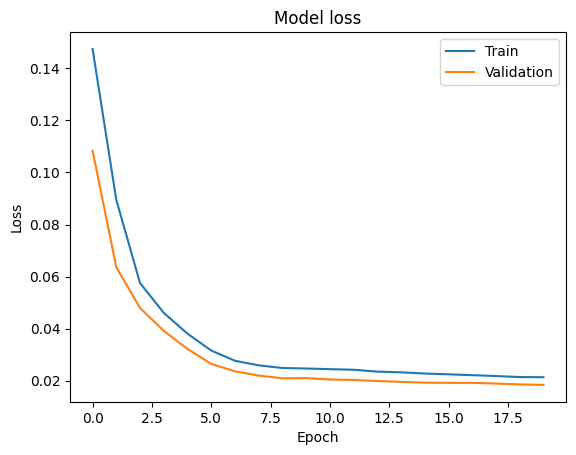

In [67]:
# Fit the model to the training data
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=72, validation_split=0.2, verbose=2)

# Visualize the training process: Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


## Test Data Preparation

- Load the test dataset from the specified path.
- Convert the 'date' column to datetime and extract relevant features.
- Scale the features using the same scaler object used for training.
- Reshape the test data to the 3D format expected by the LSTM model.
- Prepare the target values for evaluation.


In [68]:
# Load the test dataset
test_dataset_path = 'T:\Sheridan College\Sheridan Sem 2\Artificial Intelligence\Assignmnets\Project\Room Occupancy Datasets\Best DataSet\dataset2.xlsx'  # Update this to the actual path of your dataset
test_data = pd.read_excel(test_dataset_path)  # Make sure to use the correct function if your data isn't in Excel format

# Convert 'date' column to datetime and extract relevant features like we did before
test_data['date'] = pd.to_datetime(test_data['date'])
test_data['hour'] = test_data['date'].dt.hour  # Example feature extraction

# Scale the features using the same scaler object we used for the training data
X_test = test_data[features]  # Make sure 'features' matches what was used in training
X_test_scaled = scaler.transform(X_test)

# Reshape the test data to 3D format as expected by the LSTM model
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Prepare the target values
y_test = test_data[target]


## Model Evaluation

- Evaluate the trained model on the test data.
- Calculate the test loss.


In [69]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Test Loss: {test_loss}')


Test Loss: 0.029271867126226425


## Making Predictions

- Generate predictions using the trained model on the test data.
- Optionally, compare the first few predictions to the actual occupancy values.


In [70]:
# Making predictions
predictions = model.predict(X_test_reshaped)

# Optionally, compare the first few predictions to the actual occupancy values
for pred, actual in zip(predictions[:5], y_test[:5]):
    print(f'Predicted: {pred[0]}, Actual: {actual}')  # Adjusted for potential multidimensional output from predict


305/305 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted: 0.881683349609375, Actual: 1
Predicted: 0.8695221543312073, Actual: 1
Predicted: 0.864288330078125, Actual: 1
Predicted: 0.876029372215271, Actual: 1
Predicted: 0.8701813220977783, Actual: 1


## Refining the Model

- Define a new model with increased LSTM units (from 50 to 100) for potential improvement.
- Compile and fit the refined model to the training data.


In [71]:
# Define a new model with more LSTM units
model_refined = Sequential()
model_refined.add(LSTM(units=100, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))  # Increased from 50 to 100
model_refined.add(Dense(1))
model_refined.compile(optimizer='adam', loss='mean_squared_error')

# Fit the refined model
model_refined.fit(X_train_reshaped, y_train, epochs=20, batch_size=72, validation_split=0.2, verbose=2)


Epoch 1/20


C:\Users\Talwinder Singh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


73/73 - 1s - 19ms/step - loss: 0.1318 - val_loss: 0.0872
Epoch 2/20
73/73 - 0s - 2ms/step - loss: 0.0671 - val_loss: 0.0487
Epoch 3/20
73/73 - 0s - 2ms/step - loss: 0.0455 - val_loss: 0.0374
Epoch 4/20
73/73 - 0s - 2ms/step - loss: 0.0356 - val_loss: 0.0285
Epoch 5/20
73/73 - 0s - 2ms/step - loss: 0.0287 - val_loss: 0.0234
Epoch 6/20
73/73 - 0s - 2ms/step - loss: 0.0263 - val_loss: 0.0216
Epoch 7/20
73/73 - 0s - 2ms/step - loss: 0.0247 - val_loss: 0.0210
Epoch 8/20
73/73 - 0s - 2ms/step - loss: 0.0244 - val_loss: 0.0201
Epoch 9/20
73/73 - 0s - 2ms/step - loss: 0.0237 - val_loss: 0.0198
Epoch 10/20
73/73 - 0s - 2ms/step - loss: 0.0234 - val_loss: 0.0221
Epoch 11/20
73/73 - 0s - 2ms/step - loss: 0.0231 - val_loss: 0.0193
Epoch 12/20
73/73 - 0s - 2ms/step - loss: 0.0225 - val_loss: 0.0192
Epoch 13/20
73/73 - 0s - 2ms/step - loss: 0.0224 - val_loss: 0.0190
Epoch 14/20
73/73 - 0s - 2ms/step - loss: 0.0221 - val_loss: 0.0188
Epoch 15/20
73/73 - 0s - 2ms/step - loss: 0.0215 - val_loss: 0.0190

## Saving and Loading the Model

- Save the trained model for later use.
- Use `load_model` to load the saved model back into memory.
- Example of further training or evaluation with the loaded model.


In [83]:
# # Save the model
# # Saves the model for later use
# model.save('T:\Sheridan College\Sheridan Sem 2\Artificial Intelligence\Assignmnets\Project\Room Occupancy Datasets\Best DataSet\ATM_AI_model.keras')

# # To load the model back
# from tensorflow.keras.models import load_model
# loaded_model = load_model('T:\Sheridan College\Sheridan Sem 2\Artificial Intelligence\Assignmnets\Project\Room Occupancy Datasets\Best DataSet\ATM_AI_model.keras')

# Example of training (you can also evaluate if you don't need further training)
# loaded_model.fit(X_train_reshaped, y_train, epochs=1, batch_size=72, validation_split=0.2, verbose=2)


## Making Predictions and Comparing with Actual Values

- Use the trained model to make predictions on the test data.
- Optionally, compare the first few predictions with the actual occupancy values.


In [84]:
# Making predictions
predictions = model.predict(X_test_reshaped)

# Optionally, compare the first few predictions to the actual occupancy values
for pred, actual in zip(predictions[:5], y_test[:5]):
    print(f'Predicted: {pred[0]}, Actual: {actual}')  # Adjusted for potential multidimensional output from predict


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
Predicted: 0.925297200679779, Actual: 1
Predicted: 0.9180999398231506, Actual: 1
Predicted: 0.911882758140564, Actual: 1
Predicted: 0.7713047862052917, Actual: 1
Predicted: 0.7620310187339783, Actual: 1


## Example New Data Processing

- Prepare new data for prediction by scaling and reshaping it.
- Replace the example data with your actual new data.


In [85]:
# Example new data (replace this with your actual new data)
new_data = {
    'Temperature': [22.1, 21.5, 22.5],
    'Humidity': [27.2, 25.3, 26.9],
    'Light': [455.0, 465.0, 470.0],
    'CO2': [1200.0, 1150.0, 1225.0],
    'HumidityRatio': [0.0048, 0.0047, 0.0049],
    'hour': [14, 15, 16]  # Assuming you have this feature from previous steps
}

new_data_df = pd.DataFrame(new_data)

# Scale the features using the same scaler object from training
new_data_scaled = scaler.transform(new_data_df)

# Reshape the data to 3D format as expected by the LSTM model
new_data_reshaped = new_data_scaled.reshape((new_data_scaled.shape[0], 1, new_data_scaled.shape[1]))


## Making Predictions

- Utilizes the trained model to predict occupancy based on new data.
- Prints the predicted values for each data point.


In [73]:
# Making predictions
new_predictions = model.predict(new_data_reshaped)

# Printing predictions
print("Predicted values:")
for i, prediction in enumerate(new_predictions):
    print(f"Data Point {i+1}: {prediction[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted values:
Data Point 1: 1.015344500541687
Data Point 2: 1.0521162748336792
Data Point 3: 1.0405553579330444


## Visualizing Occupancy for Various Days of the Week

- Filters the dataset for a specific day, e.g., '2015-02-12'.
- Plots the occupancy trend over 24 hours for that day.
- X-axis represents hours of the day.
- Y-axis represents occupancy status.
- Each point represents the occupancy status at a specific hour.
- Grid lines are enabled for better visualization.
- Legend displays the label for occupancy.
- Title indicates the date for which the occupancy is visualized.
- The plot is displayed using Matplotlib.


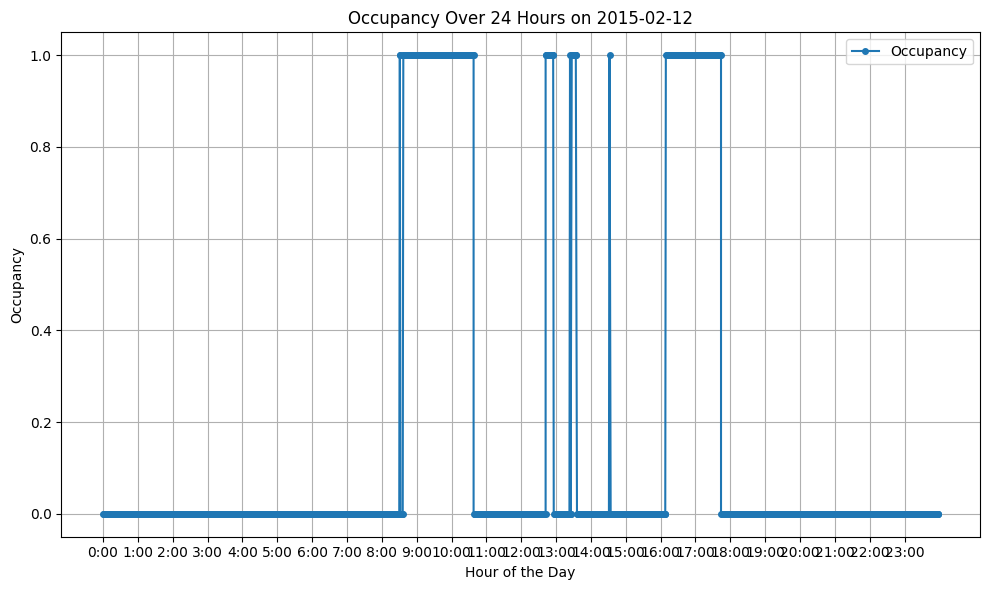

In [74]:
import matplotlib.pyplot as plt

# Filter the dataset for a specific day, e.g., '2015-02-12'
specific_day = test_data[test_data['date'].dt.date == pd.to_datetime('2015-02-12').date()]

# Now, plotting only for that day, focusing on hours
plt.figure(figsize=(10, 6))
plt.plot(specific_day['date'].dt.hour + specific_day['date'].dt.minute/60, specific_day['Occupancy'], label='Occupancy', marker='o', linestyle='-', markersize=4)
plt.title('Occupancy Over 24 Hours on 2015-02-12')
plt.xlabel('Hour of the Day')
plt.ylabel('Occupancy')
plt.xticks(range(24), labels=[f"{hour}:00" for hour in range(24)])
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()



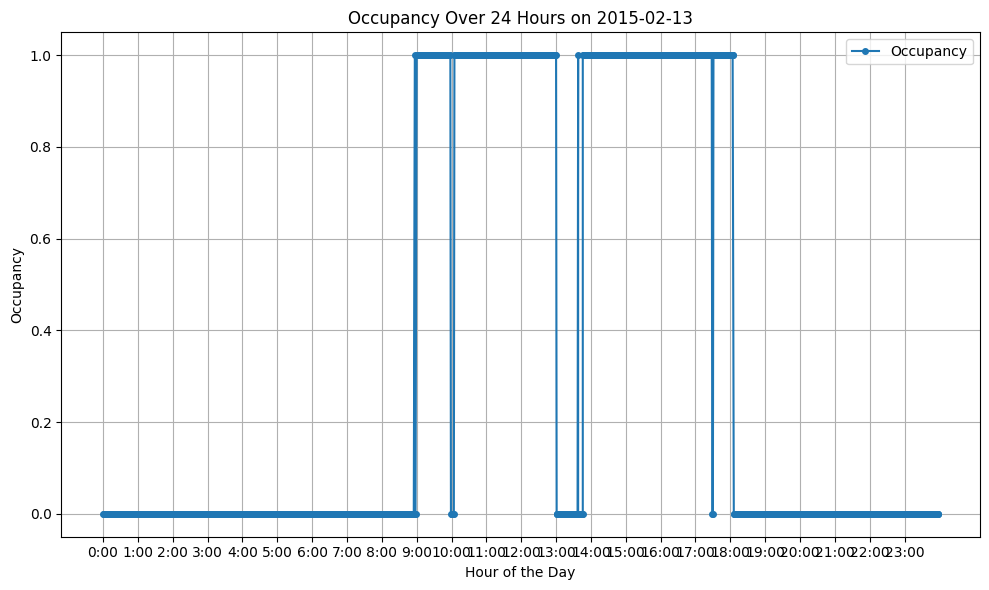

In [86]:
# Filter the dataset for a specific day, e.g., '2015-02-13'
specific_day = test_data[test_data['date'].dt.date == pd.to_datetime('2015-02-13').date()]

# Now, plotting only for that day, focusing on hours
plt.figure(figsize=(10, 6))
plt.plot(specific_day['date'].dt.hour + specific_day['date'].dt.minute/60, specific_day['Occupancy'], label='Occupancy', marker='o', linestyle='-', markersize=4)
plt.title('Occupancy Over 24 Hours on 2015-02-13')
plt.xlabel('Hour of the Day')
plt.ylabel('Occupancy')
plt.xticks(range(24), labels=[f"{hour}:00" for hour in range(24)])
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

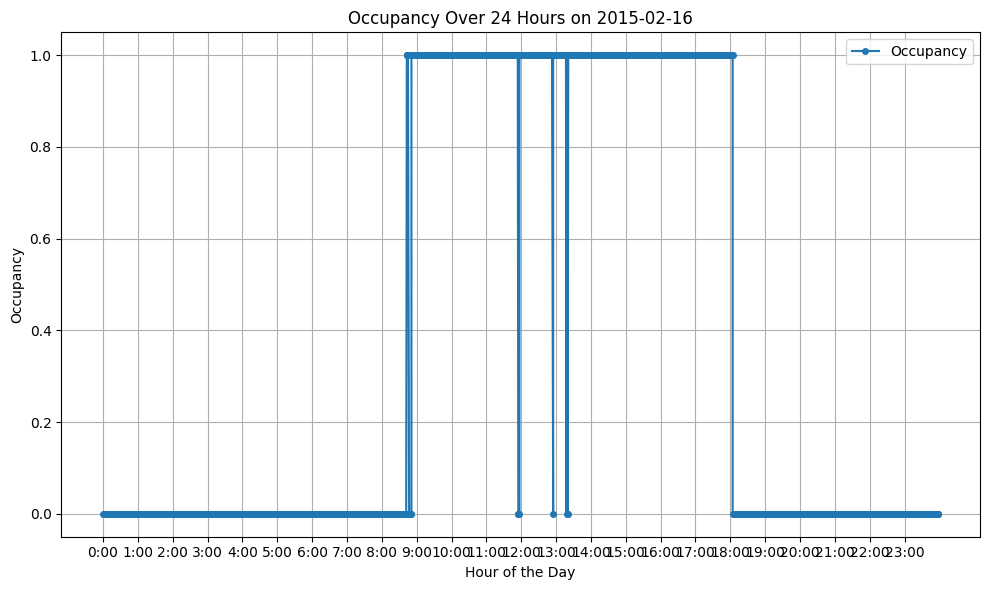

In [76]:
# Filter the dataset for a specific day, e.g., '2015-02-16'
specific_day = test_data[test_data['date'].dt.date == pd.to_datetime('2015-02-16').date()]

# Now, plotting only for that day, focusing on hours
plt.figure(figsize=(10, 6))
plt.plot(specific_day['date'].dt.hour + specific_day['date'].dt.minute/60, specific_day['Occupancy'], label='Occupancy', marker='o', linestyle='-', markersize=4)
plt.title('Occupancy Over 24 Hours on 2015-02-16')
plt.xlabel('Hour of the Day')
plt.ylabel('Occupancy')
plt.xticks(range(24), labels=[f"{hour}:00" for hour in range(24)])
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

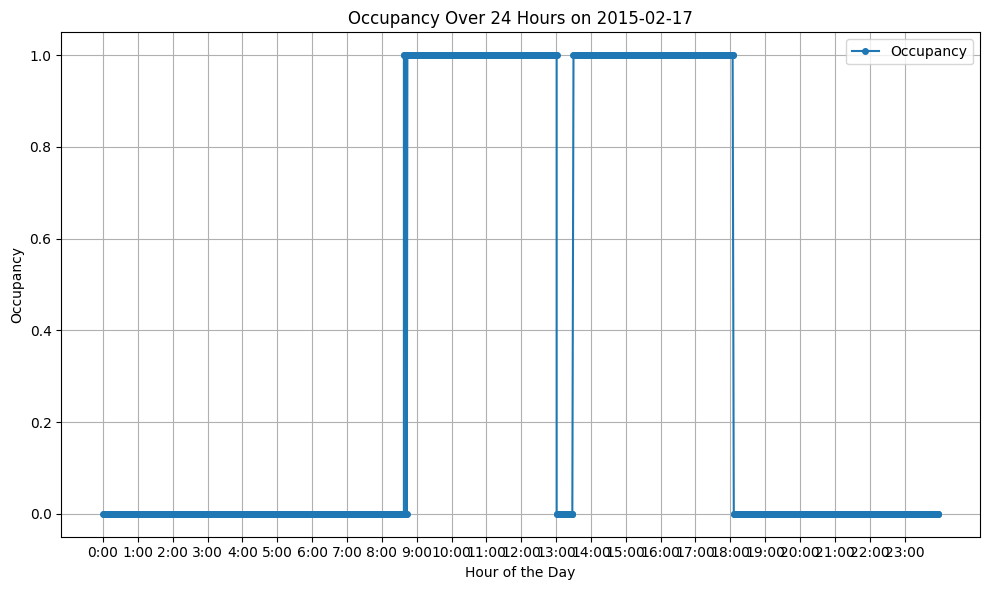

In [77]:
# Filter the dataset for a specific day, e.g., '2015-02-17'
specific_day = test_data[test_data['date'].dt.date == pd.to_datetime('2015-02-17').date()]

# Now, plotting only for that day, focusing on hours
plt.figure(figsize=(10, 6))
plt.plot(specific_day['date'].dt.hour + specific_day['date'].dt.minute/60, specific_day['Occupancy'], label='Occupancy', marker='o', linestyle='-', markersize=4)
plt.title('Occupancy Over 24 Hours on 2015-02-17')
plt.xlabel('Hour of the Day')
plt.ylabel('Occupancy')
plt.xticks(range(24), labels=[f"{hour}:00" for hour in range(24)])
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

## Visualizing General Daily Occupancy Pattern

- Converts the 'date' column to datetime format.
- Extracts the hour of the day from the 'date' column.
- Groups the data by hour and calculates the average occupancy for each hour.
- Plots the average occupancy pattern over 24 hours.
- X-axis represents hours of the day.
- Y-axis represents the average occupancy.
- Each point represents the average occupancy at a specific hour.
- Grid lines are enabled for better visualization.
- Legend displays the label for average occupancy.
- Title indicates the general daily occupancy pattern.
- The plot is displayed using Matplotlib.


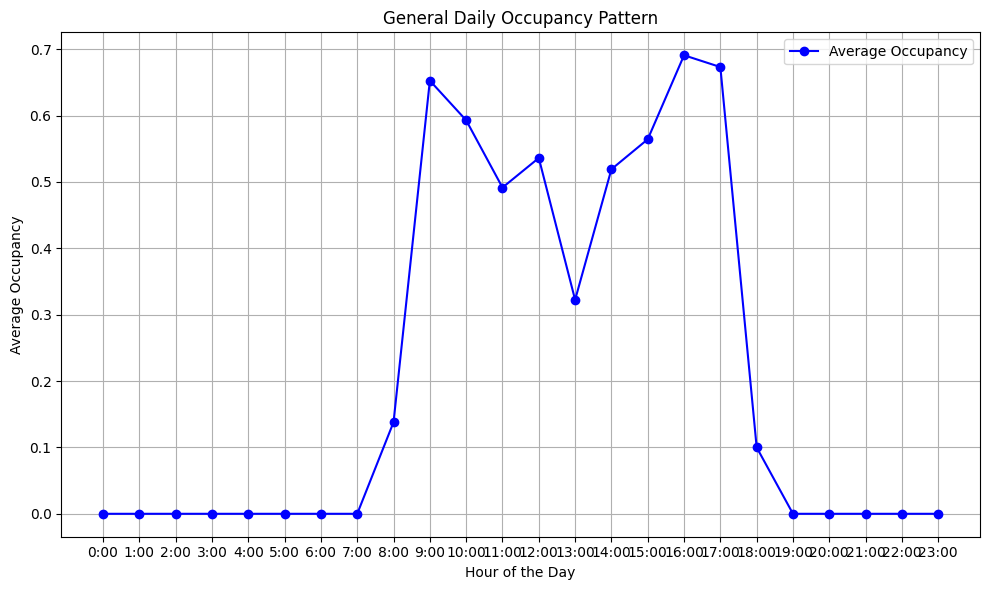

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'test_data' is your dataset and it has 'date' and 'Occupancy' columns
# First, ensure the 'date' column is in datetime format
test_data['date'] = pd.to_datetime(test_data['date'])

# Extract hour of the day and group by this to find average occupancy for each hour
test_data['hour'] = test_data['date'].dt.hour
average_occupancy_per_hour = test_data.groupby('hour')['Occupancy'].mean()

# Plotting the general daily occupancy pattern
plt.figure(figsize=(10, 6))
plt.plot(average_occupancy_per_hour.index, average_occupancy_per_hour.values, marker='o', linestyle='-', color='blue', label='Average Occupancy')
plt.title('General Daily Occupancy Pattern')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Occupancy')
plt.xticks(range(0, 24), [f'{hour}:00' for hour in range(24)])  # Set x-axis labels to show hours
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


## Visualizing General Daily Occupancy Pattern with Night Hours Highlighted

- Creates a plot of the average occupancy pattern over 24 hours.
- Highlights night hours (0-6 and 22-24) using grey shading for context.
- Identifies and marks the peak occupancy hour with a dashed red line.
- X-axis represents hours of the day.
- Y-axis represents the average occupancy.
- Each point represents the average occupancy at a specific hour.
- Grid lines are enabled for better visualization.
- Legend includes labels for average occupancy and peak hour.
- Title indicates the general daily occupancy pattern with highlighted night hours.
- The plot is displayed using Matplotlib.


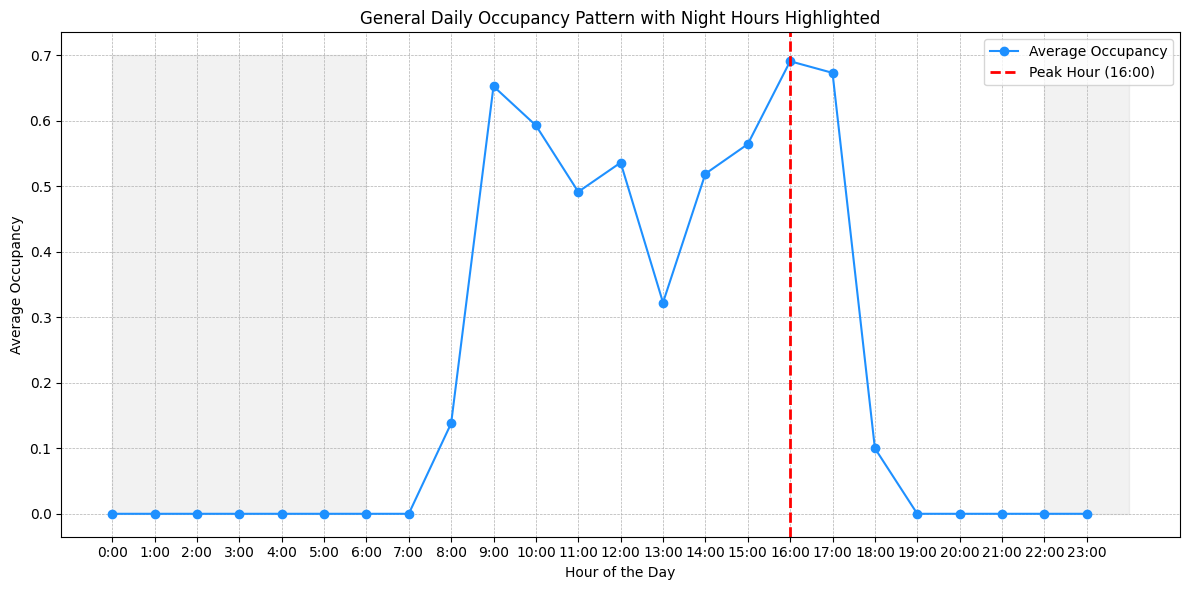

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(average_occupancy_per_hour.index, average_occupancy_per_hour.values, '-o', color='dodgerblue', label='Average Occupancy')

# Highlight night hours for context (assuming 0-6 and 22-24 as night hours)
plt.fill_betweenx(np.arange(0, max(average_occupancy_per_hour.values)+0.1, 0.1), 0, 6, color='grey', alpha=0.1)
plt.fill_betweenx(np.arange(0, max(average_occupancy_per_hour.values)+0.1, 0.1), 22, 24, color='grey', alpha=0.1)

# Highlighting the peak occupancy time
peak_hour = average_occupancy_per_hour.idxmax()
plt.axvline(x=peak_hour, color='red', linestyle='--', lw=2, label=f'Peak Hour ({peak_hour}:00)')

# Add labels and title
plt.title('General Daily Occupancy Pattern with Night Hours Highlighted')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Occupancy')
plt.xticks(range(24), [f'{hour}:00' for hour in range(24)])
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


## Loading and Preparing New Test Data for Prediction

- Imports necessary libraries: `pandas` and `MinMaxScaler` from `sklearn.preprocessing`.
- Specifies the correct file path to the test dataset, ensuring to use a raw string (`r`) to treat backslashes as literals.
- Loads the test dataset from the Excel file using `pd.read_excel`.
- Converts the 'date' column to datetime format and extracts the hour of the day.
- Defines the features to be used for prediction.
- Assumes that the `scaler` object has already been defined and fitted with the training data.
- Scales the features of the test data using the same scaler object used for training.
- Reshapes the scaled test data to a 3D format suitable for input to the LSTM model.


In [80]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Correct path to your "dataset1.xlsx" file
dataset_path = r'T:\Sheridan College\Sheridan Sem 2\Artificial Intelligence\Assignmnets\Project\Room Occupancy Datasets\Best DataSet\dataset1.xlsx'
# Make sure this path is correct. Note the 'r' before the string to treat backslashes as literal.

data_test = pd.read_excel(dataset_path)  # Loading the dataset with read_excel

# Continue with the preparation and prediction
data_test['date'] = pd.to_datetime(data_test['date'])
data_test['hour'] = data_test['date'].dt.hour

features = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'hour']
# Assuming 'scaler' is already defined and fitted with your training data:
X_test = scaler.transform(data_test[features])  # Scale the features

X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))  # Reshape for LSTM




## Making Predictions

- Assumes that the LSTM model for prediction is named 'model' and that the test data has been reshaped appropriately.
- Uses the trained model to predict the occupancy based on the test data.
- Assigns the predictions to the variable 'predicted_occupancy'.


In [81]:
# Assuming your LSTM model is named 'model' and you've already prepared 'X_test_reshaped'
predicted_occupancy = model.predict(X_test_reshaped)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step


## Predicted General Occupancy Pattern for 24 Hours

- Converts the predictions into a DataFrame for easier handling.
- Groups the predicted occupancy by hour and calculates the average for each hour.
- Plots the average predicted occupancy pattern for 24 hours.
- Assumes the predictions are stored in 'predicted_occupancy'.


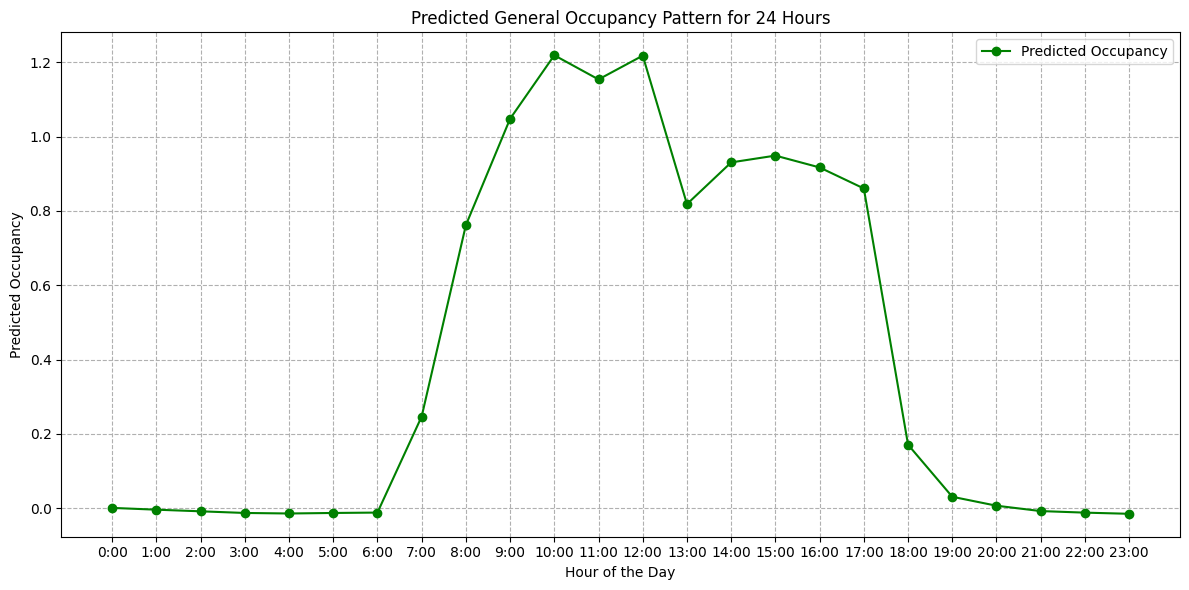

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the predictions to a DataFrame for easier manipulation
predicted_df = pd.DataFrame({'hour': data_test['hour'], 'PredictedOccupancy': predicted_occupancy.flatten()})

# Group by hour and calculate the average predicted occupancy for each hour
average_predicted_occupancy_by_hour = predicted_df.groupby('hour')['PredictedOccupancy'].mean()

# Plotting the average predicted occupancy by hour
plt.figure(figsize=(12, 6))
plt.plot(average_predicted_occupancy_by_hour.index, average_predicted_occupancy_by_hour, '-o', color='green', label='Predicted Occupancy')
plt.title('Predicted General Occupancy Pattern for 24 Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Predicted Occupancy')
plt.xticks(np.arange(24), [f"{i}:00" for i in range(24)])
plt.grid(True, linestyle='--')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

